In [ ]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import math as m
import random

# Read the CSV file
df = pd.read_csv('ESG_0.3.csv')


In [ ]:
start = datetime.datetime(2024, 8, 13)
end   = datetime.datetime(2023, 8, 13)

In [ ]:
# Dictionary to store the daily returns for each company
returns_dict = {}

# Download data and calculate daily returns for each company
for ticker in df['company_ticker']:
    data = yf.download(ticker, start='2023-08-13', end='2024-08-13')
    # Calculate daily returns (difference in adjusted close prices)
    data['Return'] = data['Adj Close'].diff()
    # Store the returns in the dictionary
    returns_dict[ticker] = data['Return']

# Convert the returns dictionary to a DataFrame
returns_df = pd.DataFrame(returns_dict)

# Drop NaN values (the first return will be NaN since there's no previous day)
returns_df = returns_df.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
print(returns_df)

                  GE        BA        TDG       MMM        PWR        CAT  \
Date                                                                        
2023-08-15 -1.350212 -4.450012  -4.301880 -1.806412  -0.339447  -7.045807   
2023-08-16 -0.222397 -2.309998  -4.735840 -0.277290  -2.426285  -2.810394   
2023-08-17 -2.073006 -5.410004 -11.449036  0.800209  -0.359451   0.648529   
2023-08-18  0.659248  2.110001  12.886169 -0.233200   2.655930  -1.346283   
2023-08-21  0.182663  0.570007  -4.649048 -0.659393   0.499222  -1.031769   
...              ...       ...        ...       ...        ...        ...   
2024-08-06  3.910004 -1.990005  27.920044  0.279999   8.449997   9.640015   
2024-08-07 -0.139999 -1.799988 -35.339966 -2.059998   0.470001  -0.640015   
2024-08-08  3.479996  5.629990  29.089966  2.299995  14.299988  10.360016   
2024-08-09  1.520004 -0.959991  14.979980 -0.959999  -3.179993   2.100006   
2024-08-12 -0.260010 -3.779999 -13.049927 -0.809998   0.420013  -2.230011   

In [ ]:
pBar = returns_df.mean()
print(pBar)
pBar_array = pBar.to_numpy()


GE      0.300377
BA     -0.290320
TDG     1.594863
MMM     0.165688
PWR     0.227249
CAT     0.225681
GD      0.278346
ATO     0.062250
TXT     0.029060
KHC     0.005930
NUE    -0.114141
STLD    0.039431
SNA     0.016977
LUV    -0.029494
LMT     0.476657
PH      0.637445
EMR     0.034578
MCD    -0.050590
dtype: float64


In [ ]:
print(pBar_array)

[ 0.30037741 -0.29032001  1.59486279  0.16568802  0.22724939  0.22568091
  0.27834613  0.06225027  0.02906049  0.00593021 -0.11414069  0.03943149
  0.01697742 -0.02949426  0.47665662  0.63744495  0.03457822 -0.05058997]


In [ ]:
# Initialize the covariance matrix DataFrame
tickers = df['company_ticker']
cov_matrix = pd.DataFrame(index=tickers, columns=tickers)

# Calculate covariance and variance
for ticker1 in tickers:
    for ticker2 in tickers:
        if ticker1 == ticker2:
            # Calculate variance for the stock
            variance = np.var(returns_df[ticker1], ddof=1)  # Sample variance
            cov_matrix.loc[ticker1, ticker2] = variance
        else:
            # Calculate covariance between the two stocks
            covariance = np.cov(returns_df[ticker1], returns_df[ticker2])[0][1]
            cov_matrix.loc[ticker1, ticker2] = covariance

# Convert all elements to floats (optional, but recommended)
cov_matrix = cov_matrix.astype(float)

# Print the covariance matrix
print(cov_matrix)


company_ticker         GE         BA         TDG       MMM        PWR  \
company_ticker                                                          
GE               5.962934   1.854611   21.453963  0.911837   5.630803   
BA               1.854611  16.322329   13.698628  1.202781   2.693213   
TDG             21.453963  13.698628  238.378562  4.310709  41.388752   
MMM              0.911837   1.202781    4.310709  4.250569   2.590476   
PWR              5.630803   2.693213   41.388752  2.590476  22.808514   
CAT              4.860704   4.316987   27.844742  2.367994  10.701638   
GD               1.910292   2.454744   12.833350  0.702718   3.535318   
ATO              0.082989   0.662962    2.948211  0.506252   0.418278   
TXT              0.863699   1.248291    5.101477  0.342080   1.953272   
KHC             -0.073269   0.071205    0.058048  0.092227  -0.063172   
NUE              1.262935   2.005113    8.293999  1.147684   3.743743   
STLD             1.519733   2.466863    8.629112  0

In [ ]:
cov_matrix_np = cov_matrix.to_numpy()
cov_matrix_np


array([[ 5.96293429e+00,  1.85461133e+00,  2.14539625e+01,
         9.11837499e-01,  5.63080325e+00,  4.86070372e+00,
         1.91029162e+00,  8.29894117e-02,  8.63698644e-01,
        -7.32693847e-02,  1.26293453e+00,  1.51973333e+00,
         2.60750203e+00,  2.85258567e-01,  4.29514551e-01,
         9.48322817e+00,  1.29052605e+00, -4.40094489e-01],
       [ 1.85461133e+00,  1.63223288e+01,  1.36986284e+01,
         1.20278100e+00,  2.69321324e+00,  4.31698714e+00,
         2.45474375e+00,  6.62962322e-01,  1.24829120e+00,
         7.12047737e-02,  2.00511284e+00,  2.46686324e+00,
         3.44280673e+00,  8.96501405e-01,  3.06825563e+00,
         9.03540725e+00,  1.56391492e+00,  1.40511674e+00],
       [ 2.14539625e+01,  1.36986284e+01,  2.38378562e+02,
         4.31070909e+00,  4.13887517e+01,  2.78447419e+01,
         1.28333505e+01,  2.94821065e+00,  5.10147719e+00,
         5.80479150e-02,  8.29399877e+00,  8.62911225e+00,
         2.14923569e+01,  1.16517511e+00,  6.32935796e

In [ ]:
rmin_values = np.arange(0, 1.5, 0.05)
# Convert the numpy array to a list (optional)
rmin_list = rmin_values.tolist()

# def Markovitz_Weights(rmin, cov_matrix_np, pBar_array):
#     N = len(cov_matrix_np)
#     o = np.ones(N)
#     SigmaInv = np.linalg.inv(cov_matrix_np)
#     A = np.dot(pBar_array.T, np.dot(SigmaInv, pBar_array))
#     B = np.dot(pBar_array.T, np.dot(SigmaInv, o))
#     C = np.dot(o.T, np.dot(SigmaInv, o))

#     # Calculate the raw weights using the given formula
#     raw_weights = (1 / (A * C - B**2)) * (np.dot(SigmaInv, (C * rmin - B) * pBar_array) + (A - B * rmin) * o)

#     # Adjust weights to ensure no short selling (weights >= 0)
#     #raw_weights[raw_weights < 0] = 0

#     # Rescale weights to sum to 1


#     return raw_weights

def Markovitz_Weights_1(rmin, cov_matrix_np, pBar_array):
    N = len(cov_matrix_np)
    o = np.ones(N)
    SigmaInv = np.linalg.inv(cov_matrix_np)
    A = np.dot(pBar_array.T, np.dot(SigmaInv, pBar_array))
    B = np.dot(pBar_array.T, np.dot(SigmaInv, o))
    C = np.dot(o.T, np.dot(SigmaInv, o))

    # Calculate the raw weights using the given formula
    raw_weights = (1 / (A * C - B**2)) * (np.dot(SigmaInv, (C * rmin - B) * pBar_array) + (A - B * rmin) * o)

    # Adjust weights to ensure no short selling (weights >= 0)
    # raw_weights[raw_weights < 0] = 0

    # # Rescale weights to sum to 1
    # total_weight = np.sum(raw_weights)
    # if total_weight > 0:  # Avoid division by zero
    #     weights = raw_weights / total_weight
    # else:
    #     weights = raw_weights  # If all weights are zero, keep them as is

    return raw_weights/np.sum(raw_weights)


def Markovitz_Weights_2(rmin, cov_matrix_np, pBar_array):
    N = len(cov_matrix_np)
    o = np.ones(N)
    SigmaInv = np.linalg.inv(cov_matrix_np)
    A = np.dot(pBar_array.T, np.dot(SigmaInv, pBar_array))
    B = np.dot(pBar_array.T, np.dot(SigmaInv, o))
    C = np.dot(o.T, np.dot(SigmaInv, o))

    # Calculate the raw weights using the given formula
    raw_weights = (1 / (A * C - B**2)) * (np.dot(SigmaInv, (C * rmin - B) * pBar_array) + (A - B * rmin) * o)

    #Adjust weights to ensure no short selling (weights >= 0)
    raw_weights[raw_weights < 0] = 0

    # Rescale weights to sum to 1
    total_weight = np.sum(raw_weights)
    if total_weight > 0:  # Avoid division by zero
        weights = raw_weights / total_weight
    else:
        weights = raw_weights  # If all weights are zero, keep them as is

    return raw_weights/np.sum(raw_weights)




In [ ]:
rmin = 0.15
weights_1 = Markovitz_Weights_1(rmin, cov_matrix_np, pBar_array)
weights_2 = Markovitz_Weights_2(rmin, cov_matrix_np, pBar_array)
# Print the calculated weights
print(weights_1)
print(weights_2)


[ 0.10658254  0.01032821  0.06157609  0.1053635   0.03931878  0.06623899
  0.08236493  0.11338375  0.02375149  0.03186783 -0.02047542  0.13617418
  0.03078961 -0.00675872  0.07821278  0.06810973  0.02678722  0.04638451]
[0.10375681 0.01005439 0.05994358 0.1025701  0.03827636 0.06448286
 0.08018127 0.1103777  0.02312179 0.03102295 0.         0.13256392
 0.02997332 0.         0.07613919 0.066304   0.02607703 0.04515476]


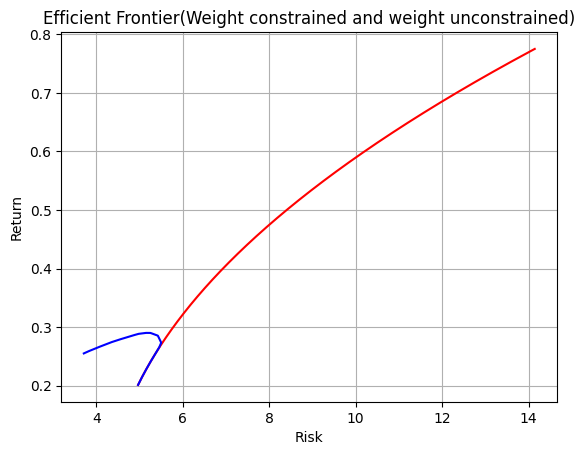

In [ ]:
# Lists to store the risks (variance) and corresponding returns
risks_1 = []
returns_1 = []
risks_2 = []
returns_2 = []

# Iterate over each rmin in rmin_list
for rmin in range(1,1000):
    # Convert the current rmin to a float
    rmin = float(rmin)
    rmin = rmin/1000
    # Calculate the weight vector for the current rmin
    weights_1 = Markovitz_Weights_1(rmin, cov_matrix_np, pBar_array)
    weights_2 = Markovitz_Weights_2(rmin, cov_matrix_np, pBar_array)

    # Calculate the expected return (dot product of weights and pBar_array)
    expected_return_1 = np.dot(weights_1, pBar_array)
    expected_return_2 = np.dot(weights_2, pBar_array)

    # Calculate the risk (portfolio variance)
    risk_1 = np.dot(weights_1.T, np.dot(cov_matrix_np, weights_1))
    risk_2 = np.dot(weights_2.T, np.dot(cov_matrix_np, weights_2))

    # Store the risk and return values
    risks_1.append(risk_1)
    returns_1.append(expected_return_1)
    risks_2.append(risk_2)
    returns_2.append(expected_return_2)

import matplotlib.pyplot as plt

# Plot the efficient frontier
plt.plot(risks_1, returns_1, label='Method 1', color = 'r')
plt.plot(risks_2, returns_2, label='Method 2', color = 'b')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier(Weight constrained and weight unconstrained)')
plt.grid(True)
plt.show()


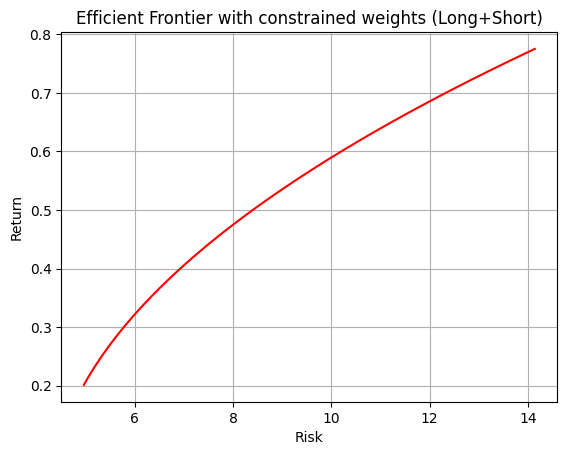

In [ ]:
plt.plot(risks_1, returns_1, label='Method 2', color = 'r')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier with constrained weights (Long+Short)')
plt.grid(True)
plt.show()

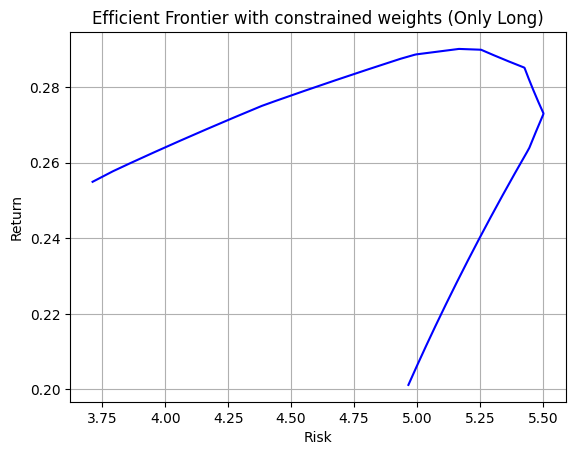

In [ ]:
plt.plot(risks_2, returns_2, label='Method 2', color = 'b')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier with constrained weights (Only Long)')
plt.grid(True)
plt.show()

#